<a href="https://colab.research.google.com/github/hoaian1232812/Lab_ML/blob/main/Lab_4_20130193_HoThanhHoaiAn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This lab is to continous dealing with **Logistic Regression**, **kNN**, and **Decision Tree** alogirthms applied to classification tasks. 

*   **Deadline: 23:59, 12/03/2023**



# Import libraries

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split as tts
from sklearn import metrics as m
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/Lab_ML'

#Task 1. 
Apply **LogisticRegression** to iris dataset which aims at classifying species of iris based on sepal_length (chiều dài đài hoa), sepal_width, petal_length (chiều dài cánh hoa), petal_width. The species are '**setosa**' '**versicolor**' and '**virginica**'. 



```
from sklearn import datasets
data4 = datasets.load_iris()
```




In [3]:
data4 = datasets.load_iris()


In [41]:
loc_regression = LogisticRegression(random_state=0)
data4_x_train, data4_x_test, data4_y_train, data4_y_test = tts(data4['data'], data4['target'], test_size=0.3, random_state=0)
loc_regression.fit(data4_x_train, data4_y_train)

LogisticRegression(random_state=0)

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2 1 1 2 0 2 0 0]
Confusion: [[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
Precision: 0.9777777777777777
Recall: 0.9777777777777777
F1: 0.9777777777777777
Confusion_display: <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x7f5ce688f0d0>
Accuracy: 0.9777777777777777


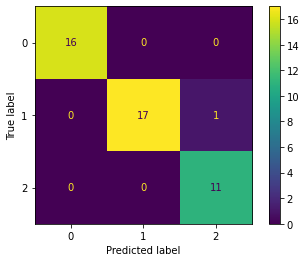

In [42]:
data4_y_pred = loc_regression.predict(data4_x_test)
ps1 = m.precision_score(data4_y_test, data4_y_pred, average='micro')
rs1 = m.recall_score(data4_y_test, data4_y_pred, average='micro')
fs1 = m.f1_score(data4_y_test, data4_y_pred, average='micro')
as1 = m.accuracy_score(data4_y_test, data4_y_pred)
print(data4_y_pred)
print('Confusion:',m.confusion_matrix(data4_y_test, data4_y_pred))
print('Precision:', ps1)
print('Recall:', rs1)
print('F1:', fs1)
print('Confusion_display:', m.ConfusionMatrixDisplay.from_predictions(data4_y_test, data4_y_pred))
print('Accuracy:', as1)

#Task 2. 
Apply LogisticRegression to **MNIST** dataset (mnist.csv) which aims at classifying handwritten digits. Dataset includes 784 pixels values of images (28x28). 


```
from sklearn import datasets
# load the MNIST digits dataset
mnist = datasets.load_digits()
```



In [ ]:
from sklearn import datasets
# load the MNIST digits dataset
mnist = datasets.load_digits()

In [ ]:
mnist_x_train, mnist_x_test, mnist_y_train, mnist_y_test = tts(mnist['data'], mnist['target'], test_size=0.3, random_state=1)
loc_regression.fit(mnist_x_train, mnist_y_train)

Confusion: [[59  0  0  0  0  0  0  0  0  0]
 [ 0 48  0  0  1  0  0  0  0  0]
 [ 0  0 49  0  0  0  0  0  0  0]
 [ 0  0  1 61  0  0  0  1  1  0]
 [ 0  1  0  0 60  0  0  0  0  0]
 [ 0  1  1  1  0 43  0  0  0  1]
 [ 0  0  0  0  0  0 51  0  0  0]
 [ 0  0  0  1  1  0  0 54  0  1]
 [ 0  0  1  0  0  1  0  0 44  0]
 [ 0  1  0  0  0  1  0  0  1 54]]
Precision: 0.9685185185185186
Recall: 0.9685185185185186
F1: 0.9685185185185186
Confusion_display: <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x7ff3b5c12ee0>
Accuracy: 0.9685185185185186


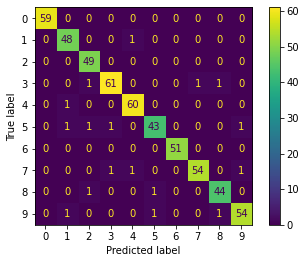

In [ ]:
pred = loc_regression.predict(mnist_x_test)
ps = m.precision_score(mnist_y_test, pred, average='micro')
rs =  m.recall_score(mnist_y_test, pred, average='micro')
fs = m.f1_score(mnist_y_test, pred, average='micro')
a_s = m.accuracy_score(mnist_y_test, pred)
print('Confusion:',m.confusion_matrix(mnist_y_test, pred))
print('Precision:',ps)
print('Recall:',rs)
print('F1:',fs)
print('Confusion_display:', m.ConfusionMatrixDisplay.from_predictions(mnist_y_test, pred))
print('Accuracy:',a_s)


#Task 3. 
Apply another classification algorithm named kNN, which is an instance classifcation model. 
*  3.1. Perform kNN algorithm to Iris dataset with k={1, 3, 5, …, 29}. Select the best value of k.

*   3.2. Then compare the obtained results with those using Logistic regression (based on metrics: accuracy, precision, recall, f1 measure).


In [43]:
acc=[]
prec =[]
recall=[]
f1=[]
k_range = range(1,30,2)
for k in k_range:
  KNN = KNeighborsClassifier(n_neighbors=k)
  KNN.fit(data4_x_train, data4_y_train)
  pred = KNN.predict(data4_x_test)
  acc.append(m.accuracy_score(data4_y_test, pred))
  prec.append(m.precision_score(data4_y_test, pred, average='micro'))
  recall.append( m.recall_score(data4_y_test, pred, average='micro'))
  f1.append(m.f1_score(data4_y_test, pred, average='micro'))

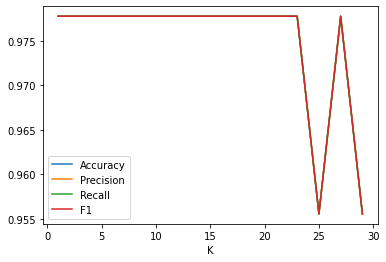

In [44]:
plt.plot(k_range, acc, label='Accuracy')
plt.plot(k_range, prec, label='Precision')
plt.plot(k_range, recall, label='Recall')
plt.plot(k_range, f1, label='F1')
plt.xlabel('K')
plt.legend()

In [45]:
d_KNN = {'Accuracy':max(acc), 'Precision':max(prec), 'Recall':max(recall), 'F1': max(f1)}
d_Logictis =  {'Accuracy': as1, 'Precision': ps1, 'Recall': rs1, 'F1': fs1}
pd.DataFrame({'KNN' : pd.Series(d_KNN), 'Logictis Regression':pd.Series(d_Logictis)})

,KNN,Logictis Regression
Accuracy,0.977778,0.977778
Precision,0.977778,0.977778
Recall,0.977778,0.977778
F1,0.977778,0.977778


#Task 4. 
Similar to Task 3, apply kNN algorithm to **mnist** dataset which included in datasets of sklearn API.
*  4.1.	Perform kNN algorithm to Iris dataset with k={1, 3, 5, …, 29}. Select the best value of k.
*  4.2.	Then compare the obtained results with those using Logistic regression (based on metrics: accuracy, precision, recall, f1 measure).


In [ ]:
acc=[]
prec =[]
recall=[]
f1=[]
k_range = range(1,30,2)
for k in k_range:
  KNN = KNeighborsClassifier(n_neighbors=k)
  KNN.fit(mnist_x_train, mnist_y_train)
  pred = KNN.predict(mnist_x_test)
  acc.append(m.accuracy_score(mnist_y_test, pred))
  prec.append(m.precision_score(mnist_y_test, pred, average='micro'))
  recall.append( m.recall_score(mnist_y_test, pred, average='micro'))
  f1.append(m.f1_score(mnist_y_test, pred, average='micro'))

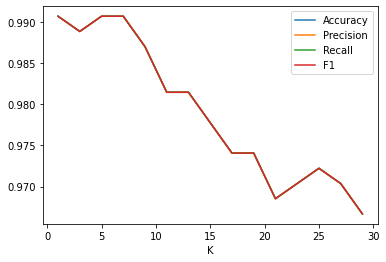

In [ ]:
plt.plot(k_range, acc, label='Accuracy')
plt.plot(k_range, prec, label='Precision')
plt.plot(k_range, recall, label='Recall')
plt.plot(k_range, f1, label='F1')
plt.xlabel('K')
plt.legend()

In [ ]:
d_KNN = {'Accuracy':max(acc), 'Precision':max(prec), 'Recall':max(recall), 'F1': max(f1)}
d_Logictis =  {'Accuracy': a_s, 'Precision': ps, 'Recall': rs, 'F1': fs}
pd.DataFrame({'KNN' : pd.Series(d_KNN), 'Logictis Regression':pd.Series(d_Logictis)})

,KNN,Logictis Regression
Accuracy,0.990741,0.968519
Precision,0.990741,0.968519
Recall,0.990741,0.968519
F1,0.990741,0.968519


#Task 5. 
Compare the performance of selected classification algorithms (**Decision Tree, kNN, and Logistic Regression**) to ***spam detection***. The dataset can be accessed from the link: http://archive.ics.uci.edu/ml/datasets/Spambase 
Attribute Information:
The last column of 'spambase.csv denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail. Most of the attributes indicate whether a particular word or character was frequently occuring in the e-mail. The run-length attributes (55-57) measure the length of sequences of consecutive capital letters. For the statistical measures of each attribute, see the end of this file. Here are the definitions of the attributes: 
*  48 continuous real [0,100] attributes of type word_freq_WORD 
= percentage of words in the e-mail that match WORD, i.e. 100 * (number of times the WORD appears in the e-mail) / total number of words in e-mail. A "word" in this case is any string of alphanumeric characters bounded by non-alphanumeric characters or end-of-string. **Example**: word_freq_address: percentage of words in the e-mail that match ADDRESS.
*  6 continuous real [0,100] attributes of type char_freq_CHAR] 
= percentage of characters in the e-mail that match CHAR, i.e. 100 * (number of CHAR occurences) / total characters in e-mail
*  1 continuous real [1,...] attribute of type capital_run_length_average 
= average length of uninterrupted sequences of capital letters
*  1 continuous integer [1,...] attribute of type capital_run_length_longest 
= length of longest uninterrupted sequence of capital letters
*  1 continuous integer [1,...] attribute of type capital_run_length_total = sum of length of uninterrupted sequences of capital letters = total number of capital letters in the e-mail
*  1 nominal {0,1} class attribute of type spam = denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail. 


---


In order to compare the performance of selected algorithms, some common metrics including **accuracy, precision, recall, f1 measures** could be used.


In [ ]:
data = pd.read_csv('spambase.csv')
x_train, x_test, y_train, y_test = tts(data.iloc[:, :58].values, data[['class']], test_size=0.3, random_state=1)

In [ ]:
#Logistic Regression
loc_regression.fit(x_train, y_train)

[0 0 1 ... 1 0 0]
Accuracy: 0.9840695148443157
Precision: 0.9850187265917603
Recall: 0.9740740740740741
F1: 0.9795158286778398
[[833   8]
 [ 14 526]]


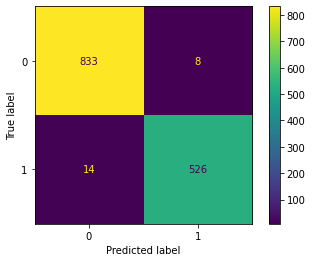

In [ ]:
y_pred = loc_regression.predict(x_test)
print(y_pred)
logistic_ac = m.accuracy_score(y_test, y_pred)
logistic_ps = m.precision_score(y_test, y_pred)
logistic_rs = m.recall_score(y_test,y_pred)
logistic_fs = m.f1_score(y_test, y_pred)
print('Accuracy:', logistic_ac)
print('Precision:', logistic_ps)
print('Recall:', logistic_rs)
print('F1:', logistic_fs)
print(m.confusion_matrix(y_test, y_pred))
print(m.ConfusionMatrixDisplay.from_predictions(y_test, y_pred))

/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

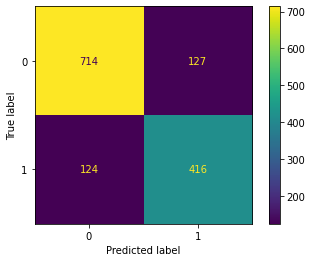

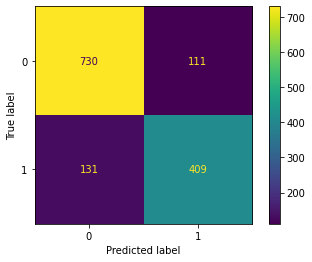

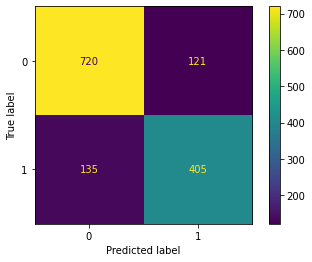

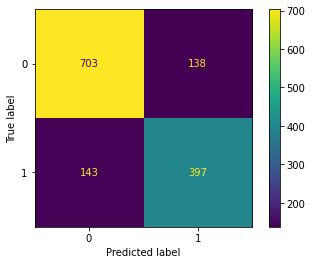

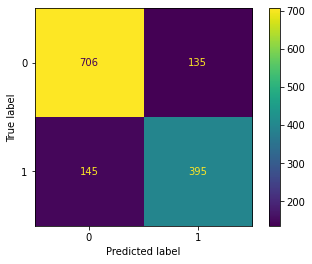

In [ ]:
#KNN
k_range = range(1, 10, 2)
KNN_ac = []
KNN_ps = []
KNN_rs = []
KNN_fs = []
for k in k_range:
  KNN = KNeighborsClassifier(n_neighbors=k)
  KNN.fit(x_train, y_train)
  y_pred = KNN.predict(x_test)
  KNN_ac.append(m.accuracy_score(y_test, y_pred))
  KNN_ps.append(m.precision_score(y_test, y_pred))
  KNN_rs.append(m.recall_score(y_test, y_pred))
  KNN_fs.append(m.f1_score(y_test, y_pred))
  m.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

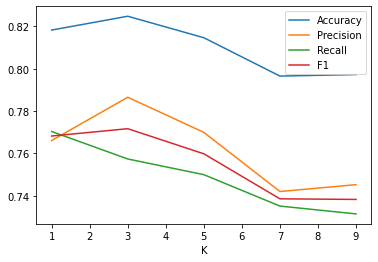

In [ ]:
plt.plot(k_range, KNN_ac, label='Accuracy')
plt.plot(k_range, KNN_ps, label='Precision')
plt.plot(k_range, KNN_rs, label='Recall')
plt.plot(k_range, KNN_fs, label='F1')
plt.xlabel('K')
plt.legend()

In [ ]:
# Decesion tree
decision_tree = tree.DecisionTreeClassifier(random_state=50)
decision_tree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=50)

[1 1 1 ... 1 0 0]
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1: 1.0


[Text(0.5, 0.75, 'x[57] <= 0.5\ngini = 0.478\nsamples = 3220\nvalue = [1947, 1273]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 1947\nvalue = [1947, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 1273\nvalue = [0, 1273]')]

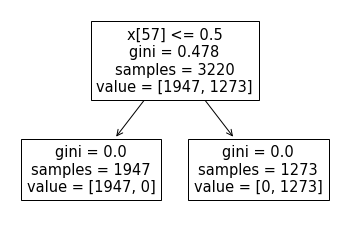

In [ ]:
y_pred = decision_tree.predict(x_test)
print(y_pred)
tree_ac = m.accuracy_score(y_test, y_pred)
tree_ps = m.precision_score(y_test, y_pred)
tree_rs = m.recall_score(y_test,y_pred)
tree_fs = m.f1_score(y_test, y_pred)
print('Accuracy:', tree_ac)
print('Precision:', tree_ps)
print('Recall:', tree_rs)
print('F1:', tree_fs)
tree.plot_tree(decision_tree)

In [ ]:
d_KNN = {'Accuracy':max(KNN_ac), 'Precision':max(KNN_ps), 'Recall':max(KNN_rs), 'F1': max(KNN_fs)}
d_Logictis =  {'Accuracy': logistic_ac, 'Precision': logistic_ps, 'Recall': logistic_rs, 'F1': logistic_fs}
d_tree = {'Accuracy': tree_ac, 'Precision': tree_ps, 'Recall': tree_rs, 'F1': tree_fs}
pd.DataFrame({'KNN' : pd.Series(d_KNN), 'Logictis Regression':pd.Series(d_Logictis), 'Decision Tree': pd.Series(d_tree)})

,KNN,Logictis Regression,Decision Tree
Accuracy,0.824765,0.984070,1.0
Precision,0.786538,0.985019,1.0
Recall,0.770370,0.974074,1.0
F1,0.771698,0.979516,1.0


#Finally,
Save a copy in your Github. Remember renaming the notebook.